In [345]:
import os
import glob
import numpy
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
import geopandas
from descartes import PolygonPatch
import random
import numpy as np
import random
from rasterio.windows import from_bounds
from shapely.geometry import Polygon
random.seed(10)

In [346]:
data = "/Users/nish/Downloads/AOI_11_Rotterdam"

In [347]:
test_no = 25

In [348]:
geojsons = sorted(glob.glob(f"{os.path.join(data, 'geojson_buildings')}/*.geojson"), key=lambda s: int(s.split("_tile_")[1].split('.')[0]))
test_geo = geojsons[test_no]
test_geo

'/Users/nish/Downloads/AOI_11_Rotterdam/geojson_buildings/SN6_Train_AOI_11_Rotterdam_Buildings_20190804120223_20190804120456_tile_63.geojson'

In [349]:
tifs = sorted(glob.glob(f"{os.path.join(data, 'PS-RGBNIR')}/*.tif"), key=lambda s: int(s.split("_tile_")[1].split('.')[0]))
test_tif = tifs[test_no]
test_tif

'/Users/nish/Downloads/AOI_11_Rotterdam/PS-RGBNIR/SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_20190804120223_20190804120456_tile_63.tif'

In [350]:
datas = list(zip(tifs, geojsons))
datas[test_no]

('/Users/nish/Downloads/AOI_11_Rotterdam/PS-RGBNIR/SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_20190804120223_20190804120456_tile_63.tif',
 '/Users/nish/Downloads/AOI_11_Rotterdam/geojson_buildings/SN6_Train_AOI_11_Rotterdam_Buildings_20190804120223_20190804120456_tile_63.geojson')

In [351]:
win = Window(512, 512, 512, 512)

In [352]:
with rio.open(test_tif) as src:
    window = from_bounds(*src.bounds, src.transform)
    srcdata = src.read(window=window)

In [353]:
src = rio.open(test_tif)

In [354]:
win.width

512

In [355]:
src.shape

(900, 900)

In [356]:
src.bounds

BoundingBox(left=594686.1399464327, bottom=5751614.174681294, right=595136.1382388433, top=5752064.1729737045)

In [357]:
srcdata[1].shape

(900, 900)

In [358]:
src.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 900, 'height': 900, 'count': 4, 'crs': CRS.from_epsg(32631), 'transform': Affine(0.49999810267850525, 0.0, 594686.1399464327,
       0.0, -0.49999810267850525, 5752064.1729737045), 'tiled': False, 'interleave': 'pixel'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


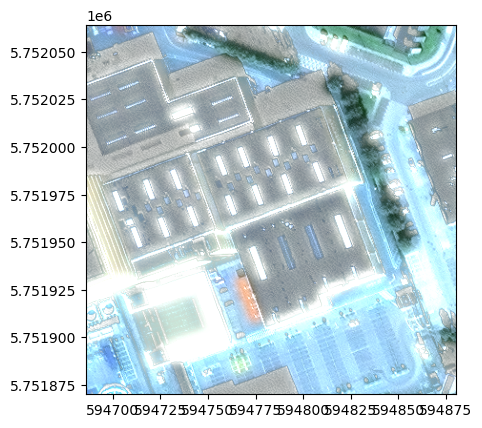

<Axes: >

In [359]:
show(src.read(window=win), transform=src.transform)

In [520]:
gdf = geopandas.read_file(test_geo, window=win)

In [521]:
gdf

,roof_075mean,roof_075median,roof_075stdev,Building_ID,origarea,origlen,partialDec,truncated,geometry
0,10.270000,10.270000,0.000000,35158,701.902548,0,0.006364,1,"POLYGON Z ((595134.299 5751614.179 0.000, 5951..."
1,3.550000,3.550000,0.000000,35184,12.561355,0,1.000000,0,"POLYGON Z ((595122.494 5751616.252 0.000, 5951..."
2,7.140000,7.140000,0.000000,34855,51.962709,0,1.000000,0,"POLYGON Z ((595111.980 5751665.246 0.000, 5951..."
3,33.205057,35.509998,15.294426,46092,22082.008630,0,0.937484,1,"POLYGON Z ((594978.409 5751672.435 0.000, 5949..."
4,12.658299,12.660000,0.003757,46144,1530.005711,0,0.553941,1,"POLYGON Z ((595136.134 5751702.000 0.000, 5951..."
5,7.420000,7.420000,0.000000,35315,7.756448,0,1.000000,0,"POLYGON Z ((595085.101 5751745.023 0.000, 5950..."
6,13.440000,13.440000,0.000000,46452,241.693631,0,1.000000,0,"POLYGON Z ((595112.596 5751789.736 0.000, 5951..."
7,10.520000,10.520000,0.000000,46483,583.097525,0,1.000000,0,"POLYGON Z ((595098.410 5751798.421 0.000, 5950..."
8,14.230000,14.230000,0.000000,46484,523.055343,0,0.544858,1,"POLYGON Z ((594706.885 5751817.403 0.000, 5947..."
9,7.600000,7.600000,0.000000,45657,14.744508,0,1.000000,0,"POLYGON Z ((595081.815 5751823.023 0.000, 5950..."


In [362]:
len(gdf)

27

In [363]:
gdf['geometry']

0     POLYGON Z ((595134.299 5751614.179 0.000, 5951...
1     POLYGON Z ((595122.494 5751616.252 0.000, 5951...
2     POLYGON Z ((595111.980 5751665.246 0.000, 5951...
3     POLYGON Z ((594978.409 5751672.435 0.000, 5949...
4     POLYGON Z ((595136.134 5751702.000 0.000, 5951...
5     POLYGON Z ((595085.101 5751745.023 0.000, 5950...
6     POLYGON Z ((595112.596 5751789.736 0.000, 5951...
7     POLYGON Z ((595098.410 5751798.421 0.000, 5950...
8     POLYGON Z ((594706.885 5751817.403 0.000, 5947...
9     POLYGON Z ((595081.815 5751823.023 0.000, 5950...
10    POLYGON Z ((595041.950 5751819.913 0.000, 5950...
11    POLYGON Z ((594713.951 5751815.235 0.000, 5947...
12    POLYGON Z ((594834.732 5751803.870 0.000, 5948...
13    POLYGON Z ((594984.347 5751852.247 0.000, 5949...
14    POLYGON Z ((594888.879 5751861.192 0.000, 5949...
15    POLYGON Z ((594759.173 5751830.976 0.000, 5947...
16    POLYGON Z ((594958.432 5751861.361 0.000, 5949...
17    POLYGON Z ((594943.386 5751858.574 0.000, 

<Axes: >

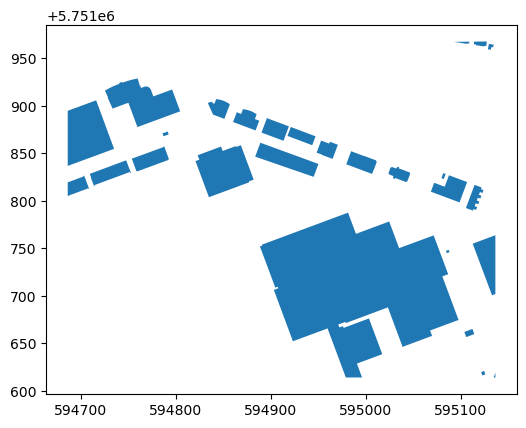

In [364]:
gdf['geometry'].plot()

In [365]:
def plot_gdf(gdf,fill=False,ax=None,linewidth=2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
        
    for geom in gdf['geometry']:
        try:
            if fill:
                patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
                ax.add_patch(patch)
            else:
                ax.plot(*geom.exterior.xy,linewidth=linewidth)
        except AttributeError:
            # TODO fix bc missing data
            pass
    return(ax)

<Axes: >

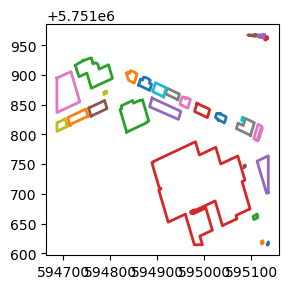

In [366]:
plot_gdf(gdf)

In [367]:
def plot_sat(path,gdf=None, fill=False,linewidth=2):
    f, ax = plt.subplots(1,figsize=(3, 3))
    f.tight_layout()
    
    r = rio.open(path)
    r = r.read()
    r = r.transpose((1,2,0,))
    
    if gdf is not None:
        ax = plot_gdf(gdf,fill=fill,ax=ax,linewidth=linewidth)
    ax.imshow(r)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


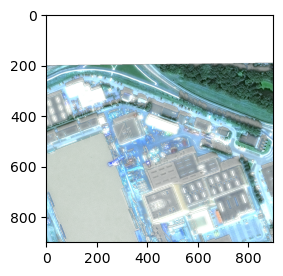

In [368]:
plot_sat(test_tif, gdf)

In [369]:
def create_meshgrid(src, step=200):

    def to_pixel_coords(relative_coords, src):
        return tuple(round(coord // dimension) for coord, dimension in zip(relative_coords, src.shape))

    left, bottom = to_pixel_coords((src.bounds.left, src.bounds.bottom), src) 
    
    right, top = to_pixel_coords((src.bounds.right, src.bounds.top), src)
    
    minc = min([left, bottom, right, top])
    
#     return (left, bottom, right, top)
    xx, yy = numpy.meshgrid(numpy.arange(left-minc, bottom, step), 
                                numpy.arange(right-minc, top, step))

    x = [z for x in xx for z in x]
    y = [z for x in yy for z in x]

    plt.plot(xx.flat, yy.flat, ".")
    plt.show()

    return list(zip(x, y))

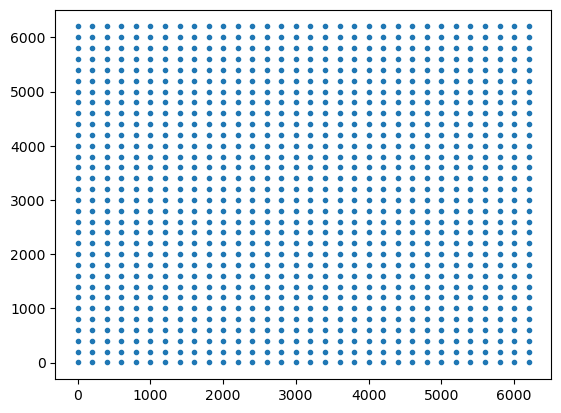

[(0, 1),
 (200, 1),
 (400, 1),
 (600, 1),
 (800, 1),
 (1000, 1),
 (1200, 1),
 (1400, 1),
 (1600, 1),
 (1800, 1),
 (2000, 1),
 (2200, 1),
 (2400, 1),
 (2600, 1),
 (2800, 1),
 (3000, 1),
 (3200, 1),
 (3400, 1),
 (3600, 1),
 (3800, 1),
 (4000, 1),
 (4200, 1),
 (4400, 1),
 (4600, 1),
 (4800, 1),
 (5000, 1),
 (5200, 1),
 (5400, 1),
 (5600, 1),
 (5800, 1),
 (6000, 1),
 (6200, 1),
 (0, 201),
 (200, 201),
 (400, 201),
 (600, 201),
 (800, 201),
 (1000, 201),
 (1200, 201),
 (1400, 201),
 (1600, 201),
 (1800, 201),
 (2000, 201),
 (2200, 201),
 (2400, 201),
 (2600, 201),
 (2800, 201),
 (3000, 201),
 (3200, 201),
 (3400, 201),
 (3600, 201),
 (3800, 201),
 (4000, 201),
 (4200, 201),
 (4400, 201),
 (4600, 201),
 (4800, 201),
 (5000, 201),
 (5200, 201),
 (5400, 201),
 (5600, 201),
 (5800, 201),
 (6000, 201),
 (6200, 201),
 (0, 401),
 (200, 401),
 (400, 401),
 (600, 401),
 (800, 401),
 (1000, 401),
 (1200, 401),
 (1400, 401),
 (1600, 401),
 (1800, 401),
 (2000, 401),
 (2200, 401),
 (2400, 401),
 (2600,

In [370]:
create_meshgrid(src)

In [371]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [372]:
import math

# This function gets just one pair of coordinates based on the angle theta
def get_circle_coord(theta, x_center, y_center, radius):
    x = radius * math.cos(theta) + x_center
    y = radius * math.sin(theta) + y_center
    return (x,y)

# This function gets all the pairs of coordinates
def get_all_circle_coords(x_center, y_center, radius, n_points):
    thetas = [i/n_points * math.tau for i in range(n_points)]
    circle_coords = [get_circle_coord(theta, x_center, y_center, radius) for theta in thetas]
    return circle_coords

def circle_coords_fn(x_center, y_center, radius, n_points):
    """
    Compute circle coordinates using a center point (x, y)
    and radius. The number of coordinates computed is n_points.
    """
    
    thetas = [i/n_points * math.tau for i in range(n_points)]
    
    return [(radius*math.cos(theta)+x_center, radius*math.sin(theta)+y_center) for theta in thetas]


# Using the second function to generate all the pairs of coordinates.
# circle_coords = circle_coords_fn(x_center = 595134, 
#                                       y_center = 5751614,
#                                       radius = 30,
#                                       n_points = 100)

In [373]:
def plot_gdf_circle(gdf, circ, fill=False,ax=None,linewidth=2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
    
    for geom in gdf['geometry']:
        try:
            if fill:
                patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
                ax.add_patch(patch)
            else:
                ax.plot(*geom.exterior.xy,linewidth=linewidth)
        except AttributeError:
            pass
    ax.plot(*circ.exterior.xy, linewidth=linewidth)
    
    return(ax)

In [374]:
def plot_gdf_circles(gdf, circs, fill=False,ax=None,linewidth=2):
    if ax is None:
        _,ax = plt.subplots(1,figsize=(3, 3))
        
    for geom in gdf['geometry']:
        try:
            if fill:
                patch = PolygonPatch(geom,linewidth=linewidth,color='fuchsia')
                ax.add_patch(patch)
            else:
                ax.plot(*geom.exterior.xy,linewidth=linewidth)
        except AttributeError:
            pass
    for circ in circs:
        ax.plot(*circ.exterior.xy, linewidth=linewidth)
        ax.axis('tight')
    return(ax)

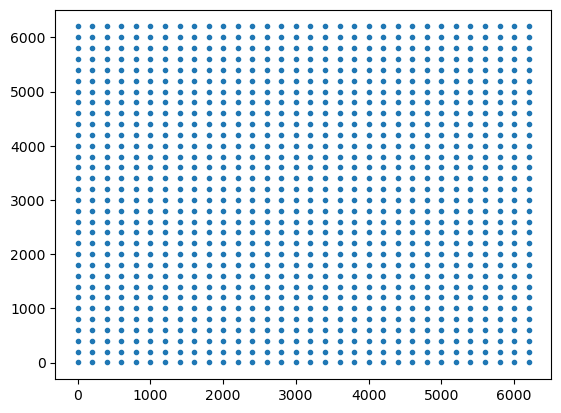

In [375]:
circle_coords = create_meshgrid(src)

In [376]:
circle_coords

[(0, 1),
 (200, 1),
 (400, 1),
 (600, 1),
 (800, 1),
 (1000, 1),
 (1200, 1),
 (1400, 1),
 (1600, 1),
 (1800, 1),
 (2000, 1),
 (2200, 1),
 (2400, 1),
 (2600, 1),
 (2800, 1),
 (3000, 1),
 (3200, 1),
 (3400, 1),
 (3600, 1),
 (3800, 1),
 (4000, 1),
 (4200, 1),
 (4400, 1),
 (4600, 1),
 (4800, 1),
 (5000, 1),
 (5200, 1),
 (5400, 1),
 (5600, 1),
 (5800, 1),
 (6000, 1),
 (6200, 1),
 (0, 201),
 (200, 201),
 (400, 201),
 (600, 201),
 (800, 201),
 (1000, 201),
 (1200, 201),
 (1400, 201),
 (1600, 201),
 (1800, 201),
 (2000, 201),
 (2200, 201),
 (2400, 201),
 (2600, 201),
 (2800, 201),
 (3000, 201),
 (3200, 201),
 (3400, 201),
 (3600, 201),
 (3800, 201),
 (4000, 201),
 (4200, 201),
 (4400, 201),
 (4600, 201),
 (4800, 201),
 (5000, 201),
 (5200, 201),
 (5400, 201),
 (5600, 201),
 (5800, 201),
 (6000, 201),
 (6200, 201),
 (0, 401),
 (200, 401),
 (400, 401),
 (600, 401),
 (800, 401),
 (1000, 401),
 (1200, 401),
 (1400, 401),
 (1600, 401),
 (1800, 401),
 (2000, 401),
 (2200, 401),
 (2400, 401),
 (2600,

In [377]:
circ = [Polygon(circle_coords_fn(circ_coors[0], circ_coors[1], 1, 100)) for circ_coors in circle_coords]

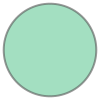

In [378]:
circ[1]

In [379]:
circ[1].bounds

(199.0, 0.0, 201.0, 2.0)

In [380]:
type(circ[1])

shapely.geometry.polygon.Polygon

In [381]:
circle = geopandas.GeoDataFrame(index=[0], crs='epsg:32631', geometry=[circ[1]])       

In [382]:
geopandas.sjoin(circle, gdf)

,geometry,index_right,roof_075mean,roof_075median,roof_075stdev,Building_ID,origarea,origlen,partialDec,truncated


<Axes: >

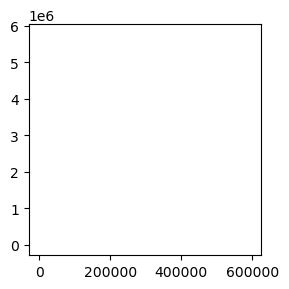

In [566]:
plot_gdf_circle(gdf, circ[1])

In [741]:
gdf = geopandas.read_file(test_geo, window=win)

<Axes: >

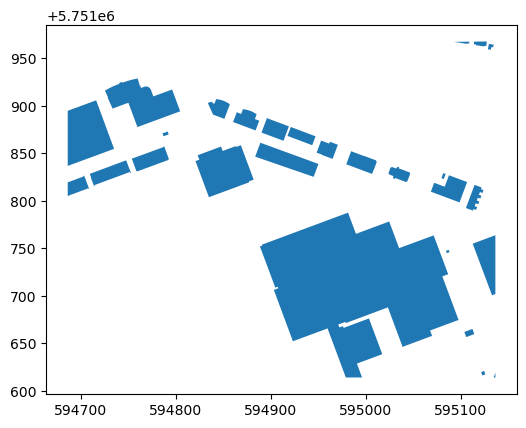

In [742]:
testgdf = gdf
testgdf['geometry'].plot()

In [743]:
def pixel_transform(polygon, src):
        minx, miny, maxx, maxy = polygon.bounds
        
        def to_pixel_coords(relative_coords, src):
            return tuple(round(coord // dimension) for coord, dimension in zip(relative_coords, src.shape))
        
        mins = to_pixel_coords((minx, miny), src)
        maxs = to_pixel_coords((maxx, maxy), src)
        minx2, miny2 = mins
        maxx2, maxy2 = maxs
#         return Polygon([(minx2, miny2), 
#                         (maxx2, miny2), 
#                         (maxx2, maxy2), 
#                         (minx2, maxy2)])

        return Polygon(circle_coords_fn(np.abs(maxx2-minx2)**minx2, np.abs(maxy2-miny2)**miny2, 1, 100))

In [744]:
testgdf['geometry'] = testgdf['geometry'].apply(lambda x: pixel_transform(x, src))

<Axes: >

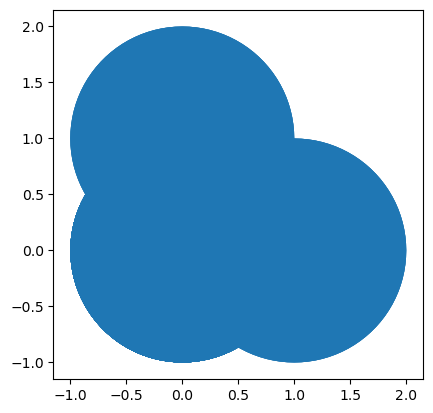

In [745]:
# should start at zero
# drop pins, and count fraction of blue pixels around pins
testgdf['geometry'].plot()

In [705]:
testgdf['geometry']

0     POLYGON ((662.000 5729.000, 661.998 5729.063, ...
1     POLYGON ((662.000 5729.000, 661.998 5729.063, ...
2     POLYGON ((662.000 5729.000, 661.998 5729.063, ...
3     POLYGON ((662.000 5730.000, 661.998 5730.063, ...
4     POLYGON ((662.000 5729.000, 661.998 5729.063, ...
5     POLYGON ((662.000 5729.000, 661.998 5729.063, ...
6     POLYGON ((662.000 5729.000, 661.998 5729.063, ...
7     POLYGON ((662.000 5729.000, 661.998 5729.063, ...
8     POLYGON ((661.000 5730.000, 660.998 5730.063, ...
9     POLYGON ((662.000 5729.000, 661.998 5729.063, ...
10    POLYGON ((662.000 5729.000, 661.998 5729.063, ...
11    POLYGON ((661.000 5730.000, 660.998 5730.063, ...
12    POLYGON ((661.000 5730.000, 660.998 5730.063, ...
13    POLYGON ((662.000 5729.000, 661.998 5729.063, ...
14    POLYGON ((662.000 5730.000, 661.998 5730.063, ...
15    POLYGON ((661.000 5730.000, 660.998 5730.063, ...
16    POLYGON ((662.000 5729.000, 661.998 5729.063, ...
17    POLYGON ((662.000 5729.000, 661.998 5729.0

In [669]:
geopandas.sjoin(circle, testgdf)

,geometry,index_right,roof_075mean,roof_075median,roof_075stdev,Building_ID,origarea,origlen,partialDec,truncated


<Axes: >

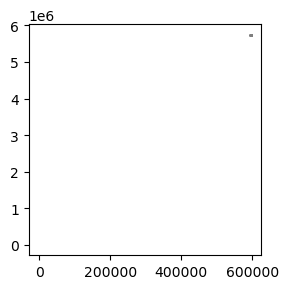

In [506]:
plot_gdf_circle(testgdf, circ[1])

In [89]:
def generate_pin_counts(data_list, rad=20, step=100, stop=6, crs='epsg:32631'):
    """
    Generate random pins (x, y) and count of buildings 
    in a given list of geojsons
    """
    out = []
    N = 0
    for rastr, geojs in data_list:
#         rad = np.random.choice([10, 20, 30, 40, 50], 1, replace=False)
#         src_ = rio.open(rastr)
        with rio.open(test_tif) as src_:
            window = from_bounds(*src_.bounds, src_.transform)
#             srcdata = src_.read(window=window)
        gdf = geopandas.read_file(geojs, window=window)
        try:
            grid = create_meshgrid(src, step=step)
            circs = [Polygon(circle_coords_fn(circ_coors[0], circ_coors[1], 10, 100)) for circ_coors in grid]                      
            circ_gdfs = [geopandas.GeoDataFrame(index=[0], geometry=[circ]) for circ in circs]
            xy = list(zip(circs, grid))
            plot_gdf_circles(gdf, circs)
#             print(grid)
#             print(len(circ_gdfs))
            # (x, y) -> (circ, pt)
            lst = [((y[0], y[1]), len(geopandas.sjoin(geopandas.GeoDataFrame(index=[0], crs=crs, geometry=[x]), gdf))) for x,y in xy]
            out.append([rastr, [x for x, _ in lst], [y for _, y in lst]])
        except IndexError:
            pass
        N += 1
        if N >= stop:
            break
    return out

KeyboardInterrupt: 

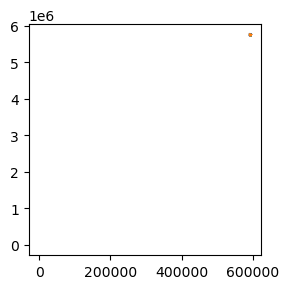

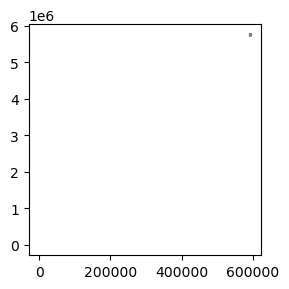

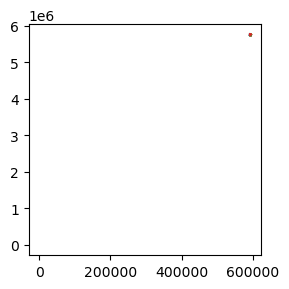

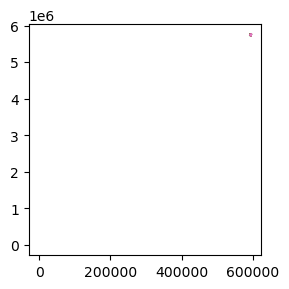

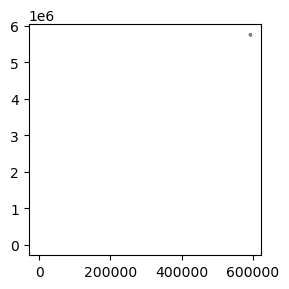

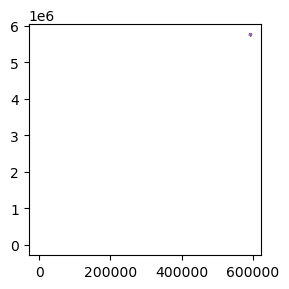

In [90]:
# set stop to len(data_list) for complete data generation
out = generate_pin_counts(datas, rad=50, step=200, stop=6)